In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
%matplotlib inline

In [29]:
path = '/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - statin/8. RNA-seq/Elizabeth/LW15 analysis/LW15_normalized.csv'
data = pd.read_csv(path)
data.head(5)
gene_conversions = data[['gene_id','gene_name']]
# gene_conversions.set_index('gene_id', inplace=True)
gene_conversions

,gene_id,gene_name
0,ENSMUSG00000000001,Gnai3
1,ENSMUSG00000000028,Cdc45
2,ENSMUSG00000000031,H19
3,ENSMUSG00000000049,Apoh
4,ENSMUSG00000000056,Narf
...,...,...
24637,ENSMUSG00002076463,---
24638,ENSMUSG00002076508,---
24639,ENSMUSG00002076570,7SK
24640,ENSMUSG00002076650,---


In [42]:
data = data[['RC.1','RC.2','RC.3','H1.1','H1.2','H1.3', 'H12.1','H12.2','H12.3','RVN.1','RVN.2','RVN.3','H2.1','H2.2','H2.3']]
# data.set_index('gene_id', inplace=True)
data.head(5)

,RC.1,RC.2,RC.3,H1.1,H1.2,H1.3,H12.1,H12.2,H12.3,RVN.1,RVN.2,RVN.3,H2.1,H2.2,H2.3
gene_id,,,,,,,,,,,,,,,
ENSMUSG00000000001,231.612000,230.273000,155.366000,142.313000,203.244000,169.737000,134.572000,125.387000,152.344000,284.066000,242.846000,229.793000,139.686000,296.971000,279.698000
ENSMUSG00000000028,71.304500,67.238700,75.939800,76.444600,73.306700,81.362700,65.952100,56.257800,70.416500,65.270700,73.563000,75.933100,62.730700,78.365200,73.653300
ENSMUSG00000000031,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000003,0.000003,0.971353,0.989254,0.952513,0.028285,0.000003,0.053162
ENSMUSG00000000049,0.060922,0.000003,0.026207,0.058292,0.000003,0.000003,0.023422,0.000003,0.000003,0.107931,0.239821,0.148833,0.000003,0.061660,0.079742
ENSMUSG00000000056,33.078700,32.345900,27.514600,15.388400,20.395100,18.795900,18.267600,14.648800,20.454900,33.457600,31.626100,31.313800,14.282500,22.504800,23.018000


In [5]:
excel_file_path = '/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/240122_MI_320genes_list.xlsx'
new_genes = pd.read_excel(excel_file_path, sheet_name='Sheet2')
new_genes = new_genes[['Ensembl','found in']]
genes_dict = {}
categories = new_genes['found in'].unique()
# print(categories)
# add category keys to dict
for category in categories:
    genes_dict[category] = []

# Iterate through the rows of the DataFrame
for index, row in new_genes.iterrows():
    gene = row['Ensembl']
    category = row['found in']
    genes_dict[category].append(gene)
    
# genes_dict
total_elements = sum(len(lst) for lst in genes_dict.values())

print("Total number of genes accounted for:", total_elements)

Total number of genes accounted for: 320


In [43]:
import numpy as np
import matplotlib.pyplot as plt

def create_gene_plots(target_genes, data, gene_conversions, axis_labels):
    """
    Creates a dictionary of matplotlib figures for individual genes with gene names converted from gene IDs.
    
    Parameters:
    - target_genes (dict): Dictionary with categories as keys and lists of gene names (IDs) as values.
    - data (pd.DataFrame): DataFrame indexed by gene names (IDs) with numerical data in columns.
    - gene_conversions (pd.DataFrame): DataFrame mapping gene IDs to gene names.
    - axis_labels (list): List of strings for the x-axis labels of the bar plots.
    
    Returns:
    - dict: A dictionary with gene names as keys and corresponding figure objects as values.
    
    Usage:
    gene_figures = create_individual_gene_figures(target_genes, data, gene_conversions, axis_labels)
    """
    gene_figures = {}
    colors = ['#D81B60', 'orange', 'orange', 'green', 'blue']  # Define color scheme

    for category, genes in target_genes.items():
        for gene in genes:
            if gene in data.index:
                # Convert gene ID to gene name
                gene_name = gene_conversions.loc[gene_conversions['gene_id'] == gene, 'gene_name'].iloc[0]
                if gene_name == '---':
                    gene_name = gene  # Use gene ID if no name conversion is available

                fig, ax = plt.subplots(figsize=(5, 5))
                means = data.loc[gene].values.reshape(-1, 3).mean(axis=1)
                stds = data.loc[gene].values.reshape(-1, 3).std(axis=1)

                ax.bar(axis_labels, means, yerr=stds, capsize=5, color=colors)
                ax.set_title(gene_name)
                ax.set_ylabel('Expression Level')

                plt.tight_layout()  # Adjust layout
                gene_figures[gene_name] = fig
                plt.close(fig)  # Close the figure to prevent it from displaying in a notebook environment

    return gene_figures


axis_labels = ['vhl+', 'vhl-,hif1-', 'vhl-,hif1&2-', 'vhl-', 'vhl-,hif2-']
plots_dict = create_gene_plots(genes_dict, data, gene_conversions, axis_labels)


In [45]:
os.chdir('/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/Elizabeth/LW15-Functional-Screening/gene plots')
for category, fig in plots_dict.items():
    fig.savefig(f"{category}.png")

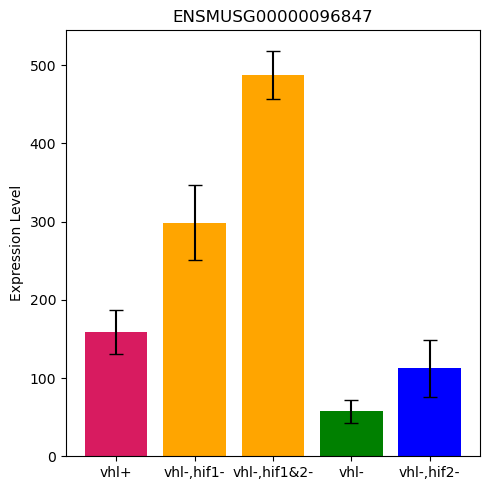

In [48]:
gene_name = 'ENSMUSG00000096847'
colors = ['#D81B60', 'orange', 'orange', 'green', 'blue']  # Define color scheme

fig, ax = plt.subplots(figsize=(5, 5))
means = data.loc[gene].values.reshape(-1, 3).mean(axis=1)
stds = data.loc[gene].values.reshape(-1, 3).std(axis=1)

ax.bar(axis_labels, means, yerr=stds, capsize=5, color=colors)
ax.set_title(gene_name)
ax.set_ylabel('Expression Level')

plt.tight_layout()  # Adjust layout
fig.savefig(f"{gene_name}.png")


In [44]:
# data.set_index('gene_id', inplace=True)
# data.drop('gene_name', axis=1, inplace=True)
data

,RC.1,RC.2,RC.3,H1.1,H1.2,H1.3,H12.1,H12.2,H12.3,RVN.1,RVN.2,RVN.3,H2.1,H2.2,H2.3
gene_id,,,,,,,,,,,,,,,
ENSMUSG00000000001,231.612000,230.273000,155.366000,142.313000,203.244000,169.737000,134.572000,125.387000,152.344000,284.066000,242.846000,229.793000,139.686000,296.971000,279.698000
ENSMUSG00000000028,71.304500,67.238700,75.939800,76.444600,73.306700,81.362700,65.952100,56.257800,70.416500,65.270700,73.563000,75.933100,62.730700,78.365200,73.653300
ENSMUSG00000000031,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000003,0.000003,0.971353,0.989254,0.952513,0.028285,0.000003,0.053162
ENSMUSG00000000049,0.060922,0.000003,0.026207,0.058292,0.000003,0.000003,0.023422,0.000003,0.000003,0.107931,0.239821,0.148833,0.000003,0.061660,0.079742
ENSMUSG00000000056,33.078700,32.345900,27.514600,15.388400,20.395100,18.795900,18.267600,14.648800,20.454900,33.457600,31.626100,31.313800,14.282500,22.504800,23.018000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00002076463,0.030462,0.088501,0.026524,0.058876,0.000003,0.026280,0.000002,0.062932,0.000003,0.000003,0.059958,0.090724,0.028285,0.000003,0.106321
ENSMUSG00002076508,0.102223,0.217590,0.348718,0.247061,0.466930,0.093601,0.211611,0.108948,0.420132,0.425389,0.305658,0.577771,0.347501,0.320089,0.272560
ENSMUSG00002076570,0.030462,0.000003,0.078616,0.000003,0.000003,0.000003,0.093683,0.155841,0.162129,0.080949,0.029980,0.059535,0.311107,0.061660,0.079742


In [9]:
# os.chdir('/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - statin/8. RNA-seq/Elizabeth/LW15 analysis/LW15-Target-Genes/gene_plots/320 LW15 Genes/composite figures')
# os.getcwd()
genes_dict.keys()

dict_keys(['PCA', 'PCA & GSEA up', 'PCA & combined volcano', 'combined volcano & individual volcano down', 'combined volcano', 'combined volcano & individual volcano up', 'combined volcano & individual volcano up & GSEA up', 'GSEA up', 'GSEA down'])

In [10]:

def plot_genes(gene_list, data, axis_labels):
    gene_plots = {}

    for gene in gene_list:
        if gene in data.index:
            # Create the plot for the gene
            fig, ax = plt.subplots()
            means = data.loc[gene].values.reshape(-1, 3).mean(axis=1)
            stds = data.loc[gene].values.reshape(-1, 3).std(axis=1)
            
            #convert ensembl id to gene name to use in title/dict key
            gene_name = gene_conversions.loc[gene_conversions['gene_id'] == gene, 'gene_name'].iloc[0]
            if gene_name == '---':
                gene_name = gene

            # Ensure the color list matches the # of bars (adjust as needed)
            colors = ['#D81B60', 'orange', 'orange', 'green', 'blue'][:len(axis_labels)]

            ax.bar(axis_labels, means, yerr=stds, capsize=5, color=colors)
            ax.set_title(gene_name)
            ax.set_ylabel('Gene Expression Level')  # Changed 'Gene Count' to 'Gene Expression Level' for clarity

            # Store the figure
            gene_plots[gene_name] = fig
            plt.close(fig)  # Prevent the immediate display
        else:
            print(f"gene {gene} missing from data")

    return gene_plots

axis_labels = ['vhl+','vhl-,hif1-','vhl-,hif1&2-','vhl-','vhl-,hif2-']

plots_dict = plot_genes(new_genes, data, axis_labels)


gene Ensembl missing from data
gene found in missing from data


In [138]:
def save_plots(plots_dict):
    for gene, fig in plots_dict.items():
        fig.savefig(f"{gene}.png")

save_plots(plots_dict)


In [71]:
70_target_genes = {'Main 8 Genes':['Atp1a1','Cltc','Ifngr1','Gpx3','Srebf2','Alyref','Niban1','Mybbp1a'], 'SREBF':['Ldlr','Srebf1','Srebf2'], 'HMGCR':['Acat1','Acat2','Hmgcr','Mvd','Pmvk','Fdps','Ggps1'],'Hypoxia':['Hif1a','Vhl','Arnt','Epas1','Vegfa','Vegfb','Slc2a1','Vegfd'],'EMT':['Cdh1','Cdh2','Acta2','Mmp9','Snai2','Snai1','Zeb1','Ntn1','Zeb2'],'Cholesterol':['Acaca','Ldlr','Fasn','Scd1','Srebf1','Spring1'], 'Other 1':['Myc','Kras','Nras','Mki67','Casp3','Uchl1'], 'Other 2':['Agfg1','Rab11a','Rptor','Lrp1','Rac1','Rac2','Rock1','Rock2'], 'Other 3':['Txnrd1','Txnrd2','Mdm2','E2f1','Trp53','Pparg','Ppard','Prdx5','Mtor'], 'Other 4':['Usp7','Mdm4','Arf1','Calr','Trib3','Ddit3','Mapk1','Sqstm1','P4ha1']}

# convert the target_genes to ensembl IDs
# Flatten the list of genes from target_genes dict
all_gene_names = [gene for category in 70_target_genes.values() for gene in category]

# Ensure unique gene names
unique_gene_names = set(all_gene_names)
len(unique_gene_names)
# Map gene names to gene IDs using the gene_conversions DataFrame
gene_ids = gene_conversions[gene_conversions['gene_name'].isin(unique_gene_names)]['gene_id'].tolist()

# gene_ids now contains the list of gene IDs
print(gene_ids[0:5])
print(len(gene_ids))

['ENSMUSG00000000303', 'ENSMUSG00000000440', 'ENSMUSG00000001847', 'ENSMUSG00000002250', 'ENSMUSG00000003814']
70


In [77]:
# Check which genes are in the new_genes list
# Initialize a list to store genes that don't exist in the DataFrame
missing_genes = []

for gene in gene_ids: 
    if gene not in new_genes: # check all the already plotted genes
        missing_genes.append(gene)

# Print or otherwise handle missing genes
if missing_genes:
    print("Missing genes:", missing_genes)
else:
    print("All genes found in the DataFrame.")

len(missing_genes)

Missing genes: ['ENSMUSG00000000303', 'ENSMUSG00000000440', 'ENSMUSG00000001847', 'ENSMUSG00000002250', 'ENSMUSG00000003814', 'ENSMUSG00000004771', 'ENSMUSG00000006517', 'ENSMUSG00000015522', 'ENSMUSG00000015837', 'ENSMUSG00000017737', 'ENSMUSG00000018339', 'ENSMUSG00000019916', 'ENSMUSG00000020009', 'ENSMUSG00000020184', 'ENSMUSG00000020250', 'ENSMUSG00000020532', 'ENSMUSG00000020538', 'ENSMUSG00000020580', 'ENSMUSG00000020902', 'ENSMUSG00000021109', 'ENSMUSG00000021302', 'ENSMUSG00000021670', 'ENSMUSG00000022346', 'ENSMUSG00000022463', 'ENSMUSG00000022676', 'ENSMUSG00000022710', 'ENSMUSG00000023832', 'ENSMUSG00000023951', 'ENSMUSG00000024140', 'ENSMUSG00000024238', 'ENSMUSG00000024290', 'ENSMUSG00000024304', 'ENSMUSG00000024953', 'ENSMUSG00000024962', 'ENSMUSG00000025134', 'ENSMUSG00000025153', 'ENSMUSG00000025408', 'ENSMUSG00000025583', 'ENSMUSG00000026159', 'ENSMUSG00000026483', 'ENSMUSG00000026872', 'ENSMUSG00000027490', 'ENSMUSG00000027852', 'ENSMUSG00000027952', 'ENSMUSG00000028

70